# Problem 1

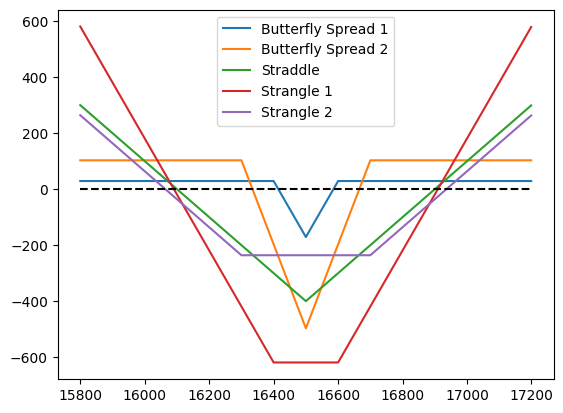

In [1]:
import numpy as np
import matplotlib.pyplot as plt

call_price= {16100:293, 16200:236, 16300:177, 16400:131, 16500:93, 16600:64, 16700:43, 16800:28.5}
put_price= {16100:114, 16200:149, 16300:194, 16400:246, 16500:308, 16600:384, 16700:466, 16800:555}
ST= np.arange(15800, 17200)

def optionProfit(pos):
    call_position= pos['call']
    put_position= pos['put']
    profit= np.zeros(ST.shape)
    
    for position in call_position:
        K= position[0]
        N= position[1]
        c= call_price[K]
        profit += (np.maximum(ST-K, 0)-c)*N
    for position in put_position:
        K= position[0]
        N= position[1]
        p= put_price[K]
        profit += (np.maximum(K-ST, 0)-p)*N
    return profit

pos1= {'call':[], 
       'put':[[16400,-2],[16600,-2],[16500,4]]
       }
p1= optionProfit(pos1)

pos2= {'call':[[16300,-3],[16700,-3],[16500,6]],
       'put':[]
       } 
p2= optionProfit(pos2)

pos3= {'call':[[16500, 1]], 
       'put':[[16500, 1]]
       }
p3= optionProfit(pos3)

pos4= {'call':[[16600, 2]], 
       'put':[[16400, 2]]
       }
p4= optionProfit(pos4)

pos5= {'call':[[16700, 1]], 
       'put':[[16300, 1]]
       }
p5= optionProfit(pos5)

plt.plot(ST, p1, label= 'Butterfly Spread 1')
plt.plot(ST, p2, label= 'Butterfly Spread 2')
plt.plot(ST, p3, label= 'Straddle')
plt.plot(ST, p4, label= 'Strangle 1')
plt.plot(ST, p5, label= 'Strangle 2')
plt.plot([ST[0], ST[-1]], [0, 0], 'k--')
plt.legend(loc= 'best')
plt.show()


# Problem 2

In [2]:
all_price= {}
for price in call_price.keys():
      pos= {'call':[[price, 1]],
            'put': [[price, -1]]
            }
      p= optionProfit(pos)
      all_price[price]= p

arb= {}
max_arb= 0
for i in call_price.keys():
      for j in call_price.keys():
            if i<=j:
                  continue
            max_arb= max(all_price[i][0]-all_price[j][0], max_arb)
            arb[max_arb]= [i, j]
print("{},{}: {}".format(arb[max_arb][0], arb[max_arb][1], max_arb))

16800,16700: 13.5


# Problem 3

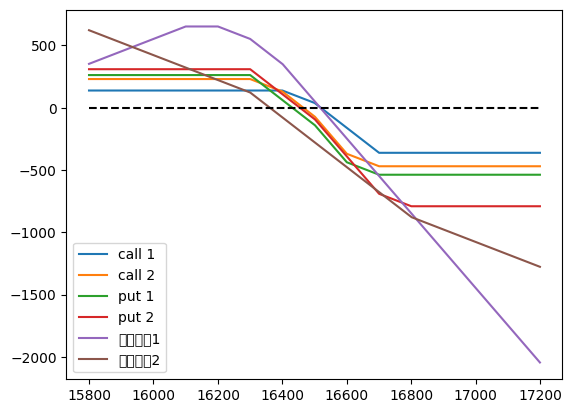

In [22]:
pos1= {'call':[[16400, -1], [16500, -1], [16700, 2]], 
       'put':[]
       }
p1= optionProfit(pos1)

pos2= {'call':[[16300, -1],[16400, -1],[16500, -1], [16600, 2], [16700, 1]],
       'put':[]
       } 
p2= optionProfit(pos2)

pos3= {'call':[], 
       'put':[[16300, -2],[16500, -1], [16600, 2], [16700, 1]]
       }
p3= optionProfit(pos3)

pos4= {'call':[], 
       'put':[[16300, -2], [16500, -1], [16700, 2], [16800, 1]]
       }
p4= optionProfit(pos4)

pos5= {'call':[[16100, -1],[16200, -1],[16300, -1]], 
       'put':[[16400, -1]]
       }
p5= optionProfit(pos5)

pos6= {'call':[[16300, -1]], 
       'put':[[16800, 1]]
       }
p6= optionProfit(pos6)



plt.plot(ST, p1, label= 'call 1')
plt.plot(ST, p2, label= 'call 2')
plt.plot(ST, p3, label= 'put 1')
plt.plot(ST, p4, label= 'put 2')
plt.plot(ST, p5, label= '空頭價差1')
plt.plot(ST, p6, label= '空頭價差2')
plt.plot([ST[0], ST[-1]], [0, 0], 'k--')
plt.legend(loc= 'best')
plt.show()